# Ensemble Learning Focus Assignment: Diabetes Prediction and Characterization

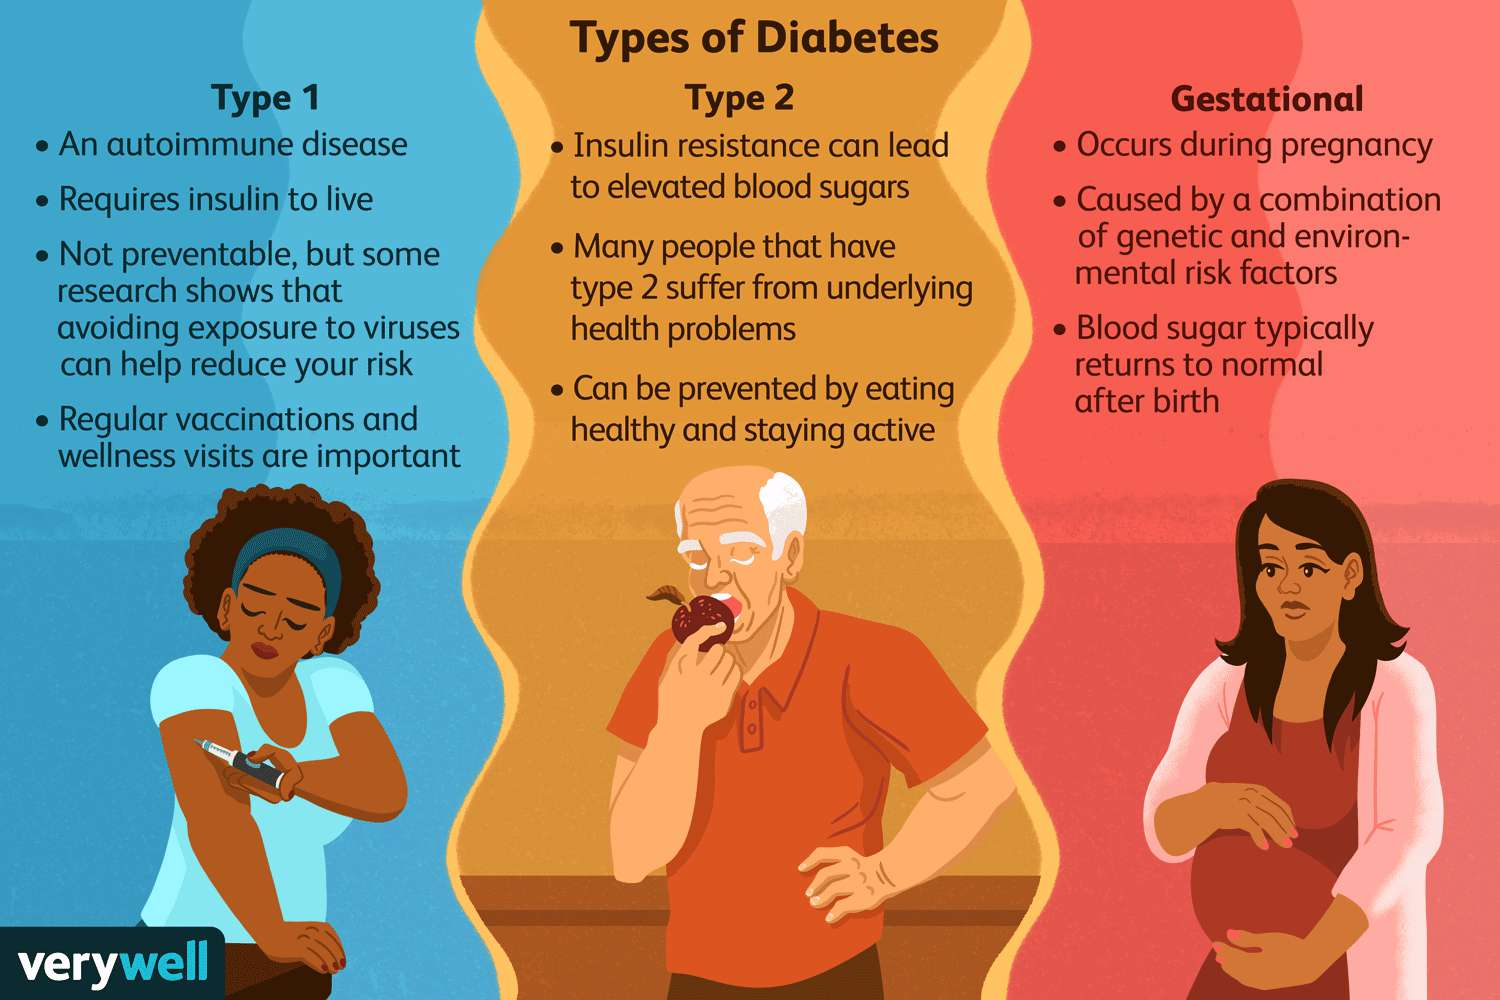

# Diabetes Types Overview

In the realm of diabetes, various types exist, each with distinct characteristics and risk factors.

## - Types of Diabetes

| Type | Description                                     | Characteristics                                     | Risk Factors                                       |
|:----:|:-----------------------------------------------:|:---------------------------------------------------:|:---------------------------------------------------:|
| **Type 1**        | Autoimmune disorder; immune system attacks insulin-producing cells. | - Diagnosed in childhood. <br> - Requires insulin injections. | - Genetic predisposition. <br> - Viral infections. |
| **Type 2**        | Insulin resistance, impaired production.          | - Usually in adulthood. <br> - Linked to poor lifestyle. | - Obesity. <br> - Family history. <br> - Age. |
| **Gestational**   | Develops during pregnancy; resolves post-childbirth. | - Elevated blood sugar during pregnancy. | - Overweight/obesity in pregnancy. <br> - Family history. |
| **LADA**          | Slow-onset autoimmune diabetes in adults.        | - Resembles Type 1 in adults. <br> - Progresses slowly. | - Autoimmune factors. <br> - Family history. |

***Note:** This table provides a concise summary of key information for each diabetes type.*
____

# Objective

In this Markdown document, our primary goal is to conduct a comprehensive analysis of the Pima Indians Diabetes Database using advanced **ensemble learning techniques**. We will apply methods such as **Gradient Boosting, Random Forests, Bagging, Voting, and Stacking** to predict and characterize diabetes, with a focus on differentiating between diabetes types.

## Data Source

The original dataset is sourced from the [Biostatistics program at Vanderbilt University](https://www.vanderbilt.edu/lapop/raw-data.php). For additional context about the Biostatistics program, you can explore their [official website](https://www.vanderbilt.edu/biostatistics-graduate/current-program/rationale-and-overview/).

The dataset for this analysis is also available on [Data World](https://data.world/informatics-edu/diabetes-prediction/workspace/file?filename=Diabetes_Classification.xlsx). For additional context about the dataset, please refer to the provided [Data World link](https://data.world/informatics-edu/diabetes-prediction/workspace/file?filename=Diabetes_Classification.xlsx).

## Dataset Overview
- **Patients:** Several hundred rural African-American patients.
- **Raw Data:** The [Diabetes_Classification.xlsx](https://data.world/informatics-edu/diabetes-prediction/workspace/file?filename=Diabetes_Classification.xlsx) file contains cleaned and manipulated data, including patients with missing data, suitable for descriptive statistics.
- **Data Dictionary:** Detailed column explanations are available in the [Diabetes Data Dictionary](./Dataset/DiabetesDataDictionary.md).

## Data Cleaning and Manipulation

- The Diabetes_Classification file underwent cleaning and manipulation.
- Patients without hemoglobin A1c measurements were excluded.
- Those with hemoglobin A1c levels ≥ 6.5 were labeled as diabetic (diabetes = yes).
- Out of 390 patients, 60 were identified as diabetic.
- A code book detailing the variables is available in one of the tabs.

## Machine Learning Task

We aim to use a machine learning classification algorithm to predict diabetes based on demographic and laboratory variables. Key objectives include:
 
- Identifying the strongest predictors within the dataset.
- Exploring prediction strength when excluding the glucose variable . 

By addressing these goals, we aim to contribute valuable insights to diabetes prediction and showcase the effectiveness of ensemble learning techniques in healthcare analytics.

____

## 1. Data Exploration and Preprocessing:
- Load the [Diabetes Classification Dataset](https://data.world/informatics-edu/diabetes-prediction/workspace/file?filename=Diabetes_Classification.xlsx) and conduct an initial exploration.
- Address missing values, outliers, and perform exploratory data analysis (EDA).
- Utilize EDA visualizations to gain insights into key features.
___

- Load the Pima Indians Diabetes Database and conduct an initial exploration.

In [1]:
#Import libreries 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import missingno as msno

In [2]:
# Read the dataset into a pandas DataFrame
df = pd.read_excel("Dataset/Diabetes_Classification.xlsx")

# Display the first few rows of the DataFrame
df

,Patient number,Cholesterol,Glucose,HDL Chol,Chol/HDL ratio,Age,Gender,Height,Weight,BMI,Systolic BP,Diastolic BP,waist,hip,Waist/hip ratio,Diabetes,Unnamed: 16,Unnamed: 17
0,1,193,77,49,3.9,19,female,61,119,22.5,118,70,32,38,0.84,No diabetes,6.0,6.0
1,2,146,79,41,3.6,19,female,60,135,26.4,108,58,33,40,0.83,No diabetes,NaN,NaN
2,3,217,75,54,4.0,20,female,67,187,29.3,110,72,40,45,0.89,No diabetes,NaN,NaN
3,4,226,97,70,3.2,20,female,64,114,19.6,122,64,31,39,0.79,No diabetes,NaN,NaN
4,5,164,91,67,2.4,20,female,70,141,20.2,122,86,32,39,0.82,No diabetes,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,386,227,105,44,5.2,83,female,59,125,25.2,150,90,35,40,0.88,No diabetes,NaN,NaN
386,387,226,279,52,4.3,84,female,60,192,37.5,144,88,41,48,0.85,Diabetes,NaN,NaN
387,388,301,90,118,2.6,89,female,61,115,21.7,218,90,31,41,0.76,No diabetes,NaN,NaN
388,389,232,184,114,2.0,91,female,61,127,24.0,170,82,35,38,0.92,Diabetes,NaN,NaN


- Dataset Attribute Encoding , and processed Overview based on Documentation

**NB:** [Columns Names Descriptions](./Dataset/ColumnsNameDescriptions.md)

- Initial exploration

In [3]:
#Convert into dataFrame 

df = pd.DataFrame(df , columns=df.columns)

In [4]:
#head
df.head()

,Patient number,Cholesterol,Glucose,HDL Chol,Chol/HDL ratio,Age,Gender,Height,Weight,BMI,Systolic BP,Diastolic BP,waist,hip,Waist/hip ratio,Diabetes,Unnamed: 16,Unnamed: 17
0,1,193,77,49,3.9,19,female,61,119,22.5,118,70,32,38,0.84,No diabetes,6.0,6.0
1,2,146,79,41,3.6,19,female,60,135,26.4,108,58,33,40,0.83,No diabetes,NaN,NaN
2,3,217,75,54,4.0,20,female,67,187,29.3,110,72,40,45,0.89,No diabetes,NaN,NaN
3,4,226,97,70,3.2,20,female,64,114,19.6,122,64,31,39,0.79,No diabetes,NaN,NaN
4,5,164,91,67,2.4,20,female,70,141,20.2,122,86,32,39,0.82,No diabetes,NaN,NaN


In [5]:
#tails

df.tail()

,Patient number,Cholesterol,Glucose,HDL Chol,Chol/HDL ratio,Age,Gender,Height,Weight,BMI,Systolic BP,Diastolic BP,waist,hip,Waist/hip ratio,Diabetes,Unnamed: 16,Unnamed: 17
385,386,227,105,44,5.2,83,female,59,125,25.2,150,90,35,40,0.88,No diabetes,NaN,NaN
386,387,226,279,52,4.3,84,female,60,192,37.5,144,88,41,48,0.85,Diabetes,NaN,NaN
387,388,301,90,118,2.6,89,female,61,115,21.7,218,90,31,41,0.76,No diabetes,NaN,NaN
388,389,232,184,114,2.0,91,female,61,127,24.0,170,82,35,38,0.92,Diabetes,NaN,NaN
389,390,165,94,69,2.4,92,female,62,217,39.7,160,82,51,51,1.00,No diabetes,NaN,NaN


In [6]:
#shape

df.shape

(390, 18)

In [7]:
df['Diabetes'].value_counts()

Diabetes
No diabetes    330
Diabetes        60
Name: count, dtype: int64

In [8]:
#data type

df.dtypes.value_counts()

int64      11
float64     5
object      2
Name: count, dtype: int64

In [9]:
#Describe

df.describe()

,Patient number,Cholesterol,Glucose,HDL Chol,Chol/HDL ratio,Age,Height,Weight,BMI,Systolic BP,Diastolic BP,waist,hip,Waist/hip ratio,Unnamed: 16,Unnamed: 17
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,1.0,1.0
mean,195.500000,207.230769,107.338462,50.266667,4.524615,46.774359,65.951282,177.407692,28.775641,137.133333,83.289744,37.869231,42.992308,0.881385,6.0,6.0
std,112.727548,44.666005,53.798188,17.279069,1.736634,16.435911,3.918867,40.407824,6.600915,22.859528,13.498192,5.760947,5.664342,0.073212,NaN,NaN
min,1.000000,78.000000,48.000000,12.000000,1.500000,19.000000,52.000000,99.000000,15.200000,90.000000,48.000000,26.000000,30.000000,0.680000,6.0,6.0
25%,98.250000,179.000000,81.000000,38.000000,3.200000,34.000000,63.000000,150.250000,24.100000,122.000000,75.000000,33.000000,39.000000,0.830000,6.0,6.0
50%,195.500000,203.000000,90.000000,46.000000,4.200000,44.500000,66.000000,173.000000,27.800000,136.000000,82.000000,37.000000,42.000000,0.880000,6.0,6.0
75%,292.750000,229.000000,107.750000,59.000000,5.400000,60.000000,69.000000,200.000000,32.275000,148.000000,90.000000,41.000000,46.000000,0.930000,6.0,6.0
max,390.000000,443.000000,385.000000,120.000000,19.300000,92.000000,76.000000,325.000000,55.800000,250.000000,124.000000,56.000000,64.000000,1.140000,6.0,6.0


In [10]:
#seprare features and target 

X = df.drop('Diabetes' , axis=1)
y =df['Diabetes']

In [11]:
# Target distribution 

y.value_counts()

Diabetes
No diabetes    330
Diabetes        60
Name: count, dtype: int64